In [1]:
library('dplyr')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
# load baseline datafiles
doe.baseline <- read.csv("./baseline_large_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.baseline <- read.csv("./baseline/baseline threat run large NOLH experiment-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.baseline)[1] <- "experiment.number"

# build the dataset
data.baseline <- merge(doe.baseline, results.baseline, "experiment.number")

# scale to real world size
data.baseline$marker.mean <- data.baseline$marker.mean * 5
data.baseline$marker.std.dev <- data.baseline$marker.std.dev * 5

## Threat UUV Baseline Performance
The threat UUV baseline is used to compare the effectiveness of the propsed counter UUV system concepts.  The general performance of the baseline threat UUV is shown in the quintile plots of the figure below.

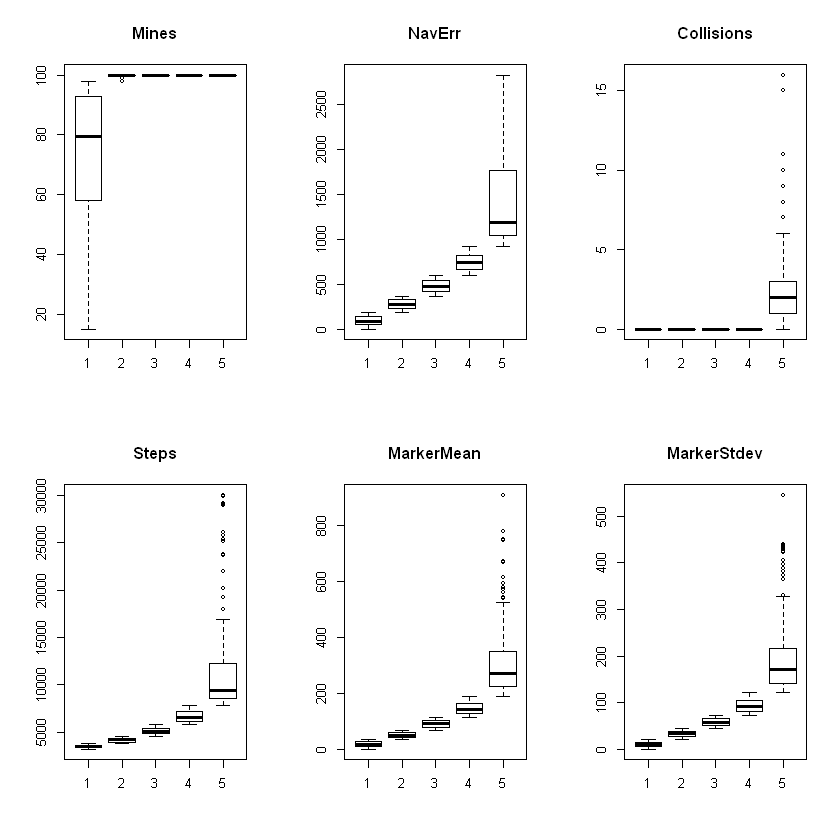

In [3]:
# split the run results into quintiles by measure of performance
data.baseline %>% mutate(
    mine.quintile = ntile(data.baseline$count.mine.contacts, 5),
    step.quintile = ntile(data.baseline$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.baseline.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')

The entire minefield is mapped in over 75% of the runs, and 95% of the mines are detected in 83% of the runs.

In [4]:
length(data.baseline$count.mine.contacts[data.baseline$count.mine.contacts == 100]) / 1290
length(data.baseline$count.mine.contacts[data.baseline$count.mine.contacts >= 95]) / 1290

[1] 0.7589147

[1] 0.8364341

In [5]:
length(data.baseline$count.mine.contacts[data.baseline$marker.mean <= 10]) / 1290
length(data.baseline$count.mine.contacts[data.baseline$marker.mean <= 100]) / 1290

[1] 0.04418605

[1] 0.5387597

The following emperical distributions provide another visualization of the threat UUV baseline effectiveness.  The data show the high likelihood of a complete survey in the Mine Detect density plots, and provide measures of the expected survey accuracy in the Marker Mean and Std error density plots

In [93]:
data.baseline.mine.ecdf <- ecdf(100 - data.baseline$count.mine.contacts)
data.baseline.nav.ecdf <- ecdf(data.baseline$max.nav.error)
data.baseline.mean.ecdf <- ecdf(data.baseline$marker.mean[data.baseline$count.mine.contacts>0])
data.baseline.std.ecdf <- ecdf(data.baseline$marker.std.dev[data.baseline$count.mine.contacts>0])

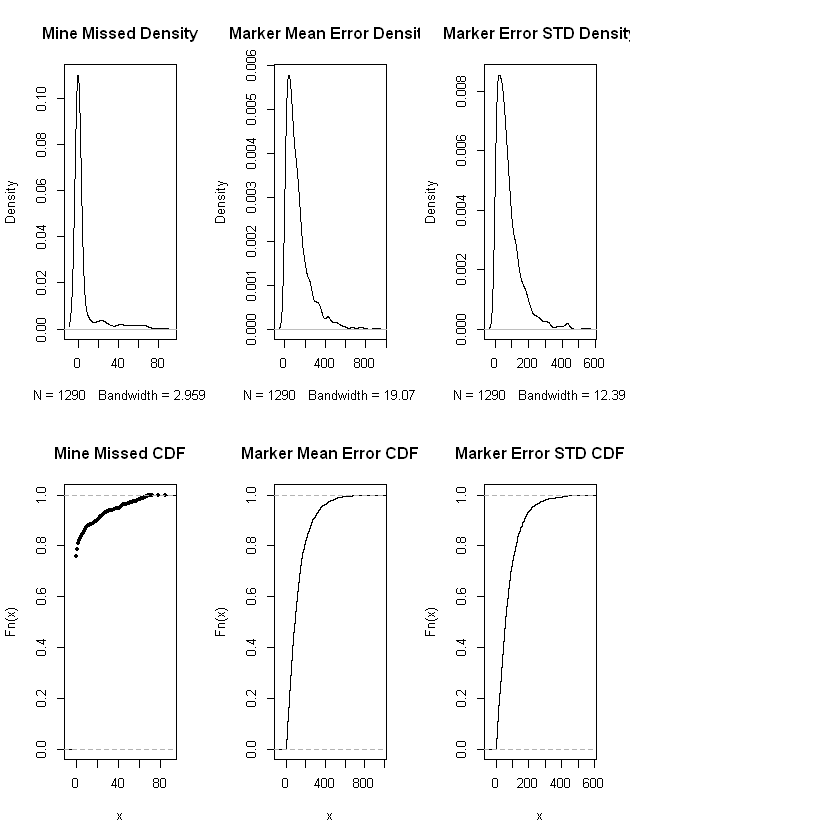

In [95]:
layout(matrix(c(1,2,3,4,5,6,7,8),2,4))
plot(density(100 - data.baseline$count.mine.contacts), main="Mine Missed Density")
plot(data.baseline.mine.ecdf, main='Mine Missed CDF')
plot(density(data.baseline$marker.mean[data.baseline$count.mine.contacts>0]), main='Marker Mean Error Density')
plot(data.baseline.mean.ecdf, main='Marker Mean Error CDF')
plot(density(data.baseline$marker.std.dev[data.baseline$count.mine.contacts>0]), main='Marker Error STD Density')
plot(data.baseline.std.ecdf, main='Marker Error STD CDF')

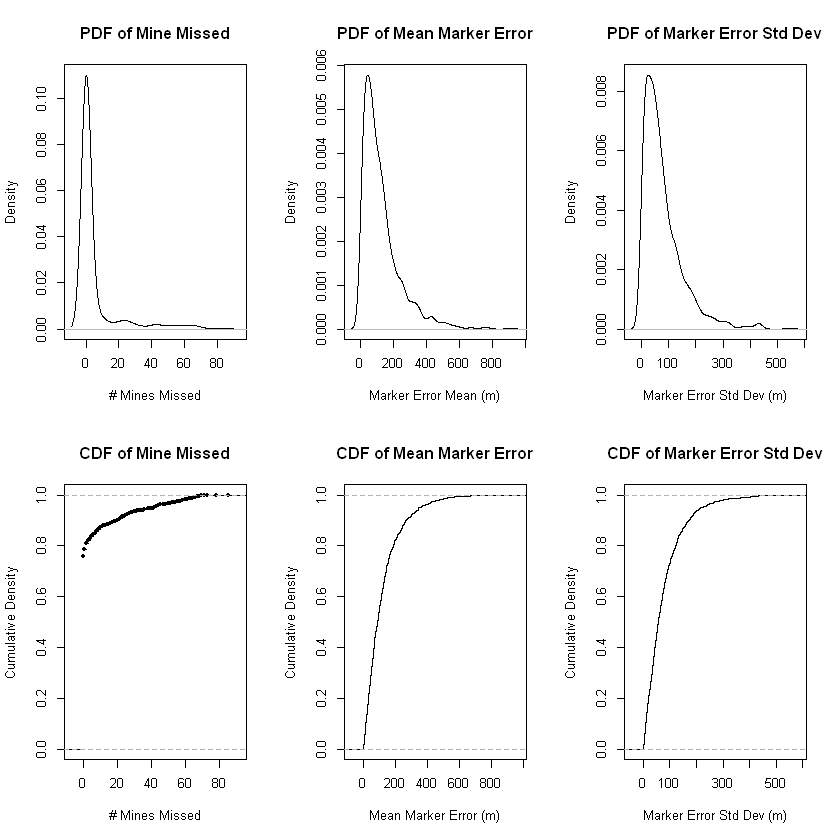

In [58]:
layout(matrix(c(1,2,3,4,5,6),2,3))
plot(density(100 - data.baseline$count.mine.contacts), 
     main="PDF of Mine Missed",
     xlab='# Mines Missed',
    )
plot(data.baseline.mine.ecdf, 
     main='CDF of Mine Missed',
     xlab='# Mines Missed',
     ylab='Cumulative Density'
    )
plot(density(data.baseline$marker.mean), 
     main='PDF of Mean Marker Error',
     xlab='Marker Error Mean (m)'
    )
plot(data.baseline.mean.ecdf, 
     main='CDF of Mean Marker Error',
     xlab='Mean Marker Error (m)',
     ylab='Cumulative Density'
    )
plot(density(data.baseline$marker.std.dev), 
     main='PDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)'
    )
plot(data.baseline.std.ecdf, 
     main='CDF of Marker Error Std Dev',
     xlab='Marker Error Std Dev (m)',
     ylab='Cumulative Density'
    )

In [108]:
data.baseline.mean.ecdf(100)
data.baseline.std.ecdf(100)

[1] 0.5387597

[1] 0.7286822

experiment.number,mn,st,ct
0,120.89525,85.68641,0
1,267.37405,178.25740,0
2,93.15792,67.26497,0
3,108.39068,68.30675,0
4,327.08670,177.57869,43
5,128.06899,91.70779,0


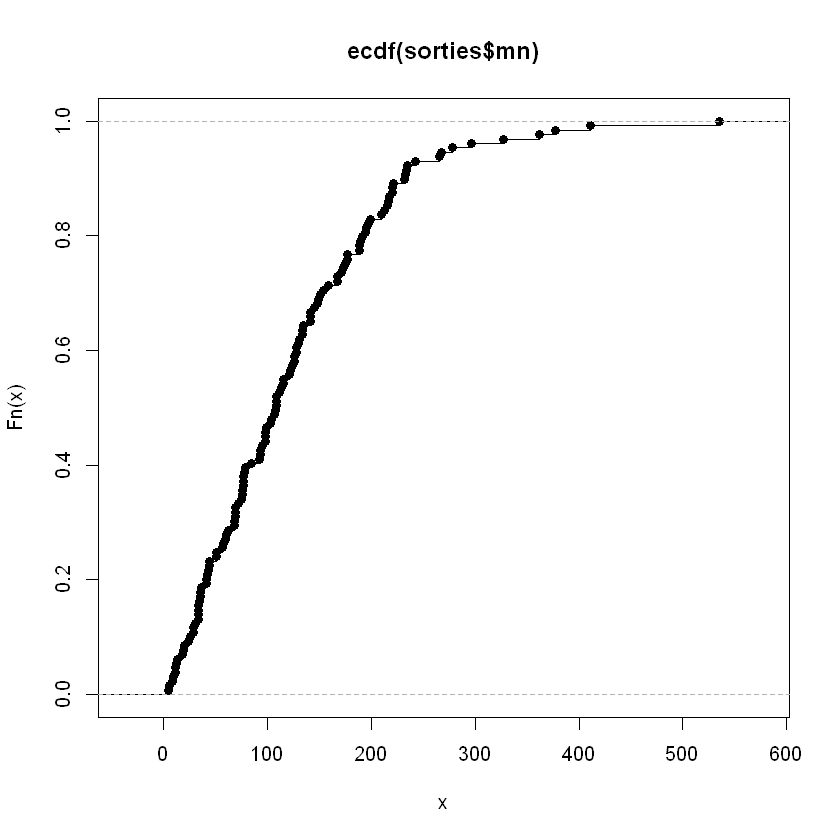

In [124]:
data.baseline %>% group_by(experiment.number) %>% summarize(mn = mean(marker.mean), st = mean(marker.std.dev), ct = mean(100-count.mine.contacts)) -> sorties
head(sorties)
plot(ecdf(sorties$mn))

In [8]:
eq.mean.baseline <- marker.mean~nav.bearing.std*uuv.speed

In [9]:
summary(data.baseline$uuv.speed)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.500   2.000   2.002   2.500   3.000 


Call:
lm(formula = eq.mean.baseline, data = data.baseline)

Residuals:
    Min      1Q  Median      3Q     Max 
-195.18  -44.36  -10.37   24.67  738.57 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 23.244     18.569   1.252    0.211    
nav.bearing.std            756.451     64.051  11.810  < 2e-16 ***
uuv.speed                  -10.277      8.935  -1.150    0.250    
nav.bearing.std:uuv.speed -141.192     30.768  -4.589 4.89e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 89.6 on 1286 degrees of freedom
Multiple R-squared:  0.4024,	Adjusted R-squared:  0.401 
F-statistic: 288.6 on 3 and 1286 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
nav.bearing.std,1,5839654.0,5839653.965,727.44107,2.381922e-127
uuv.speed,1,941579.7,941579.722,117.29184,3.223538e-26
nav.bearing.std:uuv.speed,1,169046.8,169046.757,21.05802,4.891367e-06
Residuals,1286,10323578.6,8027.666,NA,NA


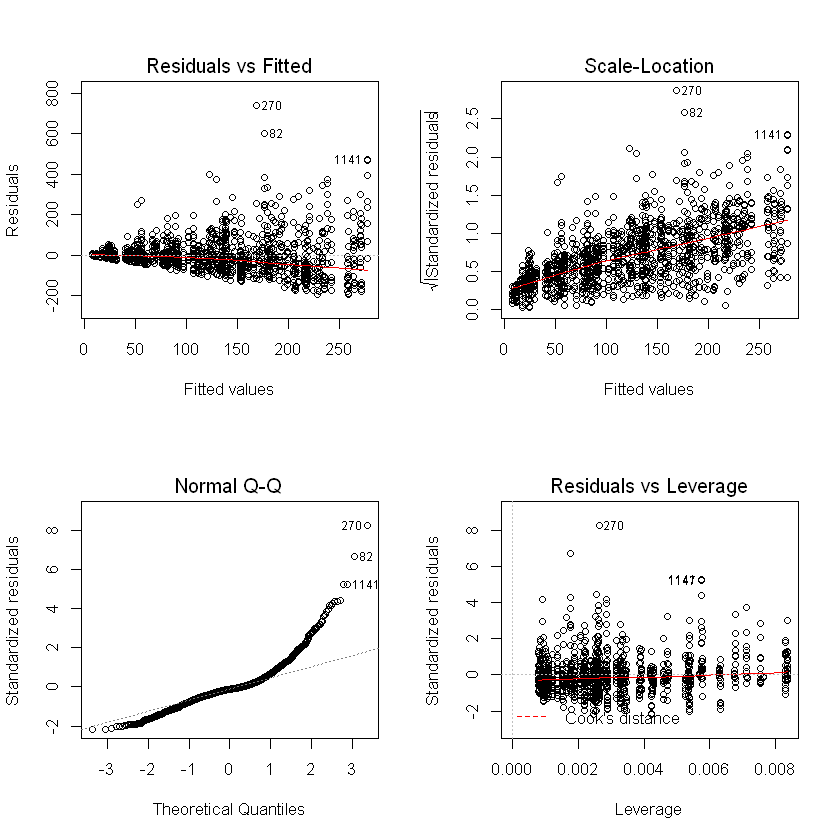

In [10]:
model.mean.baseline <- lm(eq.mean.baseline, data=data.baseline)
summary(model.mean.baseline)
anova(model.mean.baseline)
layout(matrix(c(1,2,3,4),2,2))
plot(model.mean.baseline)

The following interaction plots show how the threat UUV speed and bearing error interact to influence the mine marker error and navigation error.

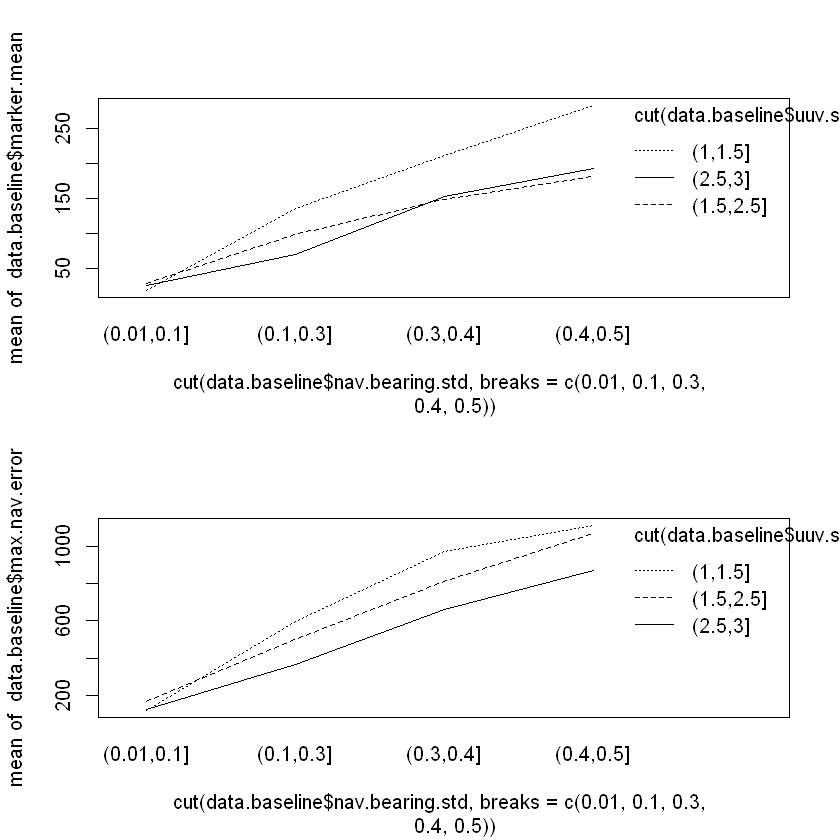

In [11]:
layout(matrix(c(1,2),2,1))
interaction.plot(cut(data.baseline$nav.bearing.std, breaks=c(0.01,0.1,0.3,0.4,0.5)), cut(data.baseline$uuv.speed, breaks=c(1,1.5,2.5,3)), data.baseline$marker.mean)
interaction.plot(cut(data.baseline$nav.bearing.std, breaks=c(0.01,0.1,0.3,0.4,0.5)), cut(data.baseline$uuv.speed, breaks=c(1,1.5,2.5,3)), data.baseline$max.nav.error)

## Counter UUV System 1 - DVL Spoofing (Confuse Navigation)
The goal of the DVL Spoofing system design was to increase the minefield map error, rendering the map ineffective or causing the adversary to navigate using poor quality data.

In [12]:
# load datafiles
doe.spoofer <- read.csv("./spoofer_grid_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.spoofer <- read.csv("./spoofer/baseline spoofer grid-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.spoofer)[1] <- "experiment.number"

# build the dataset
data.spoofer <- merge(doe.spoofer, results.spoofer, "experiment.number")

# scale to real world size
data.spoofer$marker.mean <- data.spoofer$marker.mean * 5
data.spoofer$marker.std.dev <- data.spoofer$marker.std.dev * 5

The DVL Spoofer had four simulation parameters: the grid spacing of the spoofer nodes, the radius of effect, the strength of effect, and the cardinal direction of effect.

 spoofer.spacing  spoofer.radius spoofer.heading spoofer.strength
 Min.   : 10.00   Min.   : 5.0   Min.   :  0.0   Min.   :10.00   
 1st Qu.: 33.00   1st Qu.: 9.0   1st Qu.: 90.0   1st Qu.:23.00   
 Median : 55.00   Median :13.0   Median :180.0   Median :35.00   
 Mean   : 55.01   Mean   :12.5   Mean   :179.5   Mean   :35.01   
 3rd Qu.: 78.00   3rd Qu.:16.0   3rd Qu.:269.0   3rd Qu.:48.00   
 Max.   :100.00   Max.   :20.0   Max.   :359.0   Max.   :60.00   

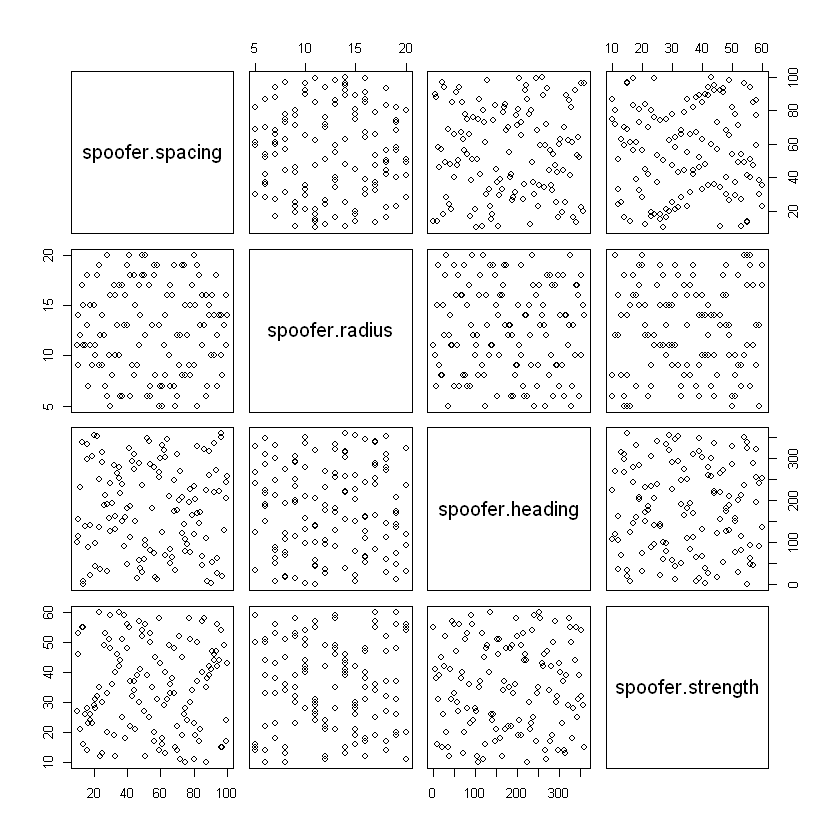

In [13]:
summary(doe.spoofer[c('spoofer.spacing', 'spoofer.radius', 'spoofer.heading', 'spoofer.strength')])
plot(doe.spoofer[c('spoofer.spacing', 'spoofer.radius', 'spoofer.heading', 'spoofer.strength')])

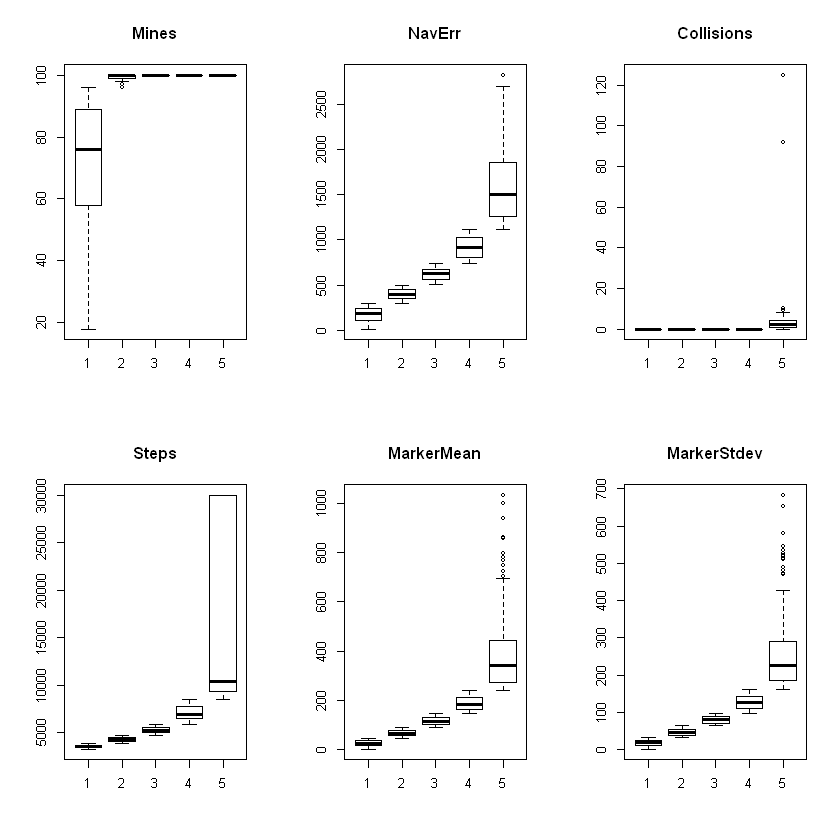

In [14]:
# split the run results into quintiles by measure of performance
data.spoofer %>% mutate(
    mine.quintile = ntile(data.spoofer$count.mine.contacts, 5),
    step.quintile = ntile(data.spoofer$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.spoofer.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.spoofer.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.spoofer.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.spoofer.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.spoofer.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.spoofer.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.spoofer.quintiles, main='MarkerStdev')

In [15]:
data.spoofer.mine.ecdf <- ecdf(100-data.spoofer$count.mine.contacts)
data.spoofer.nav.ecdf <- ecdf(data.spoofer$max.nav.error)
data.spoofer.mean.ecdf <- ecdf(data.spoofer$marker.mean[data.spoofer$count.mine.contacts>0])
data.spoofer.std.ecdf <- ecdf(data.spoofer$marker.std.dev[data.spoofer$count.mine.contacts>0])

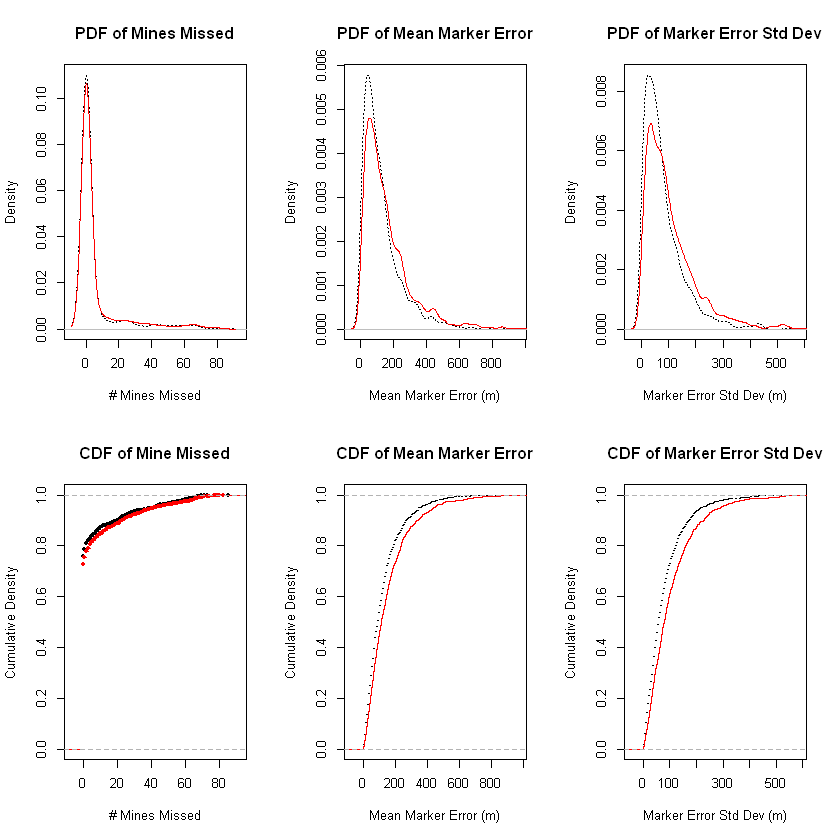

In [97]:
layout(matrix(c(1,2,3,4,5,6),2,3))

# Mines Missed
plot(density(100-data.baseline$count.mine.contacts, bw=2.959), 
     main="PDF of Mines Missed", lty=3,
     xlab='# Mines Missed'
    )
lines(density(100-data.spoofer$count.mine.contacts, bw=2.959), col='red')
plot(data.baseline.mine.ecdf, 
     main='CDF of Mine Missed',
     xlab='# Mines Missed',
     ylab='Cumulative Density'
    )
plot(data.spoofer.mine.ecdf, add=TRUE, col='red')

# Marker Mean
plot(density(data.baseline$marker.mean[data.baseline$count.mine.contacts>0], bw=19.07), 
     main='PDF of Mean Marker Error', lty=3,
     xlab='Mean Marker Error (m)'
    )
lines(density(data.spoofer$marker.mean[data.spoofer$count.mine.contacts>0], bw=19.07), col='red')
plot(data.baseline.mean.ecdf, 
     main='CDF of Mean Marker Error', lty=3,
     xlab='Mean Marker Error (m)',
     ylab='Cumulative Density'
    )
plot(data.spoofer.mean.ecdf, add=TRUE, col='red')

# Marker STD
plot(density(data.baseline$marker.std.dev[data.baseline$count.mine.contacts>0], bw=12.39), 
     main='PDF of Marker Error Std Dev',lty=3,
     xlab='Marker Error Std Dev (m)'
    )
lines(density(data.spoofer$marker.std.dev[data.spoofer$count.mine.contacts>0], bw=12.39), col='red')
plot(data.baseline.std.ecdf, main='CDF of Marker Error Std Dev', lty=3,
     xlab='Marker Error Std Dev (m)',
     ylab='Cumulative Density'
    )
plot(data.spoofer.std.ecdf, add=TRUE, col='red')

The graphs suggest that the DVL spoofer system did not have a major effect on the magnitude of the accuracy metrics, but a one-sided t test shows the impact on the mean marker error is statistically significant ($p=7.6 10^{-11}$).  The difference in means is small relative to the range of error in the baseline system however, so the effectiveness of the system may not be substantial.

In [17]:
print("Baseline")
summary(data.baseline[c('max.nav.error','marker.mean','marker.std.dev')])
print("Spoofer")
summary(data.spoofer[c('max.nav.error','marker.mean','marker.std.dev')])

[1] "Baseline"


 max.nav.error     marker.mean      marker.std.dev    
 Min.   :   5.5   Min.   :  1.498   Min.   :  0.7551  
 1st Qu.: 230.3   1st Qu.: 43.640   1st Qu.: 27.7483  
 Median : 479.5   Median : 92.135   Median : 57.3786  
 Mean   : 604.5   Mean   :123.420   Mean   : 78.3580  
 3rd Qu.: 817.7   3rd Qu.:162.569   3rd Qu.:104.9967  
 Max.   :2827.9   Max.   :906.806   Max.   :545.4060  

[1] "Spoofer"


 max.nav.error      marker.mean       marker.std.dev   
 Min.   :  11.78   Min.   :   3.076   Min.   :  1.608  
 1st Qu.: 349.56   1st Qu.:  57.452   1st Qu.: 38.596  
 Median : 629.32   Median : 115.205   Median : 79.933  
 Mean   : 743.92   Mean   : 156.485   Mean   :105.017  
 3rd Qu.:1021.29   3rd Qu.: 211.715   3rd Qu.:141.413  
 Max.   :2827.69   Max.   :1032.117   Max.   :682.976  

In [18]:
t.test(data.spoofer$marker.mean, data.baseline$marker.mean, alternative='greater')


	Welch Two Sample t-test

data:  data.spoofer$marker.mean and data.baseline$marker.mean
t = 6.4292, df = 2464.6, p-value = 7.678e-11
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 24.60225      Inf
sample estimates:
mean of x mean of y 
 156.4851  123.4202 


In [19]:
t.test(data.spoofer$marker.std.dev, data.baseline$marker.std.dev, alternative='greater')


	Welch Two Sample t-test

data:  data.spoofer$marker.std.dev and data.baseline$marker.std.dev
t = 8.0522, df = 2442.3, p-value = 6.287e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 21.21151      Inf
sample estimates:
mean of x mean of y 
105.01734  78.35796 


In [20]:
t.test(data.spoofer$max.nav.error, data.baseline$max.nav.error, alternative='greater')


	Welch Two Sample t-test

data:  data.spoofer$max.nav.error and data.baseline$max.nav.error
t = 6.7738, df = 2570.5, p-value = 7.747e-12
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 105.564     Inf
sample estimates:
mean of x mean of y 
 743.9239  604.4892 


Since the DVL spoofer system does appear to have an effect on the metrics, we want to see how the system parameters impact the outcome. Look at both a linear regression model fit, and its ANOVA table.

In [21]:
eq.mean.spoofer <- marker.mean~spoofer.spacing*spoofer.strength*spoofer.radius
model.mean.spoofer <- lm(eq.mean.spoofer, data=data.spoofer)
summary(model.mean.spoofer)
anova(model.mean.spoofer)
layout(matrix(c(1,2,3,4),2,2))
#plot(model.mean.spoofer)


Call:
lm(formula = eq.mean.spoofer, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.85  -89.50  -31.09   57.84  697.96 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     87.336912  84.632531   1.032
spoofer.spacing                                  0.749042   1.314453   0.570
spoofer.strength                                 0.380456   2.098799   0.181
spoofer.radius                                  -2.529431   6.130938  -0.413
spoofer.spacing:spoofer.strength                -0.021641   0.033561  -0.645
spoofer.spacing:spoofer.radius                   0.033806   0.098188   0.344
spoofer.strength:spoofer.radius                  0.328429   0.151859   2.163
spoofer.spacing:spoofer.strength:spoofer.radius -0.003285   0.002555  -1.285
                                                Pr(>|t|)  
(Intercept)                                       0.3023  
spoofer.spacing       

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
spoofer.spacing,1,906920.6,906920.60,48.845956,4.440255e-12
spoofer.strength,1,343965.6,343965.63,18.525690,1.803833e-05
spoofer.radius,1,551612.0,551612.02,29.709344,6.013981e-08
spoofer.spacing:spoofer.strength,1,822289.3,822289.33,44.287789,4.189943e-11
spoofer.spacing:spoofer.radius,1,126657.9,126657.94,6.821686,9.110942e-03
spoofer.strength:spoofer.radius,1,122393.9,122393.92,6.592030,1.035619e-02
spoofer.spacing:spoofer.strength:spoofer.radius,1,30677.8,30677.80,1.652279,1.988811e-01
Residuals,1282,23802834.7,18566.95,NA,NA


To get more insight into the effect of the parameters, we compare some statistics linear model for the DVL Spoofer with the baseline model.  The baseline model has a higher adjusted R-squared than the spoofer model, suggesting that the variation of the data is more impacted by threat UUV parameters than the counter system parameters.  A combined model is fit to the data accounting for both the threat UUV and system parameters and their interactions.  This model has a higher adjusted R-squared metric than either the baseline or DVL spoofer models alone. 

In [22]:
summary(model.mean.spoofer)
summary(lm(eq.mean.baseline, data=data.spoofer))
summary(lm(marker.mean~spoofer.spacing*spoofer.strength*spoofer.radius*uuv.speed*nav.bearing.std, data=data.spoofer))


Call:
lm(formula = eq.mean.spoofer, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.85  -89.50  -31.09   57.84  697.96 

Coefficients:
                                                 Estimate Std. Error t value
(Intercept)                                     87.336912  84.632531   1.032
spoofer.spacing                                  0.749042   1.314453   0.570
spoofer.strength                                 0.380456   2.098799   0.181
spoofer.radius                                  -2.529431   6.130938  -0.413
spoofer.spacing:spoofer.strength                -0.021641   0.033561  -0.645
spoofer.spacing:spoofer.radius                   0.033806   0.098188   0.344
spoofer.strength:spoofer.radius                  0.328429   0.151859   2.163
spoofer.spacing:spoofer.strength:spoofer.radius -0.003285   0.002555  -1.285
                                                Pr(>|t|)  
(Intercept)                                       0.3023  
spoofer.spacing       


Call:
lm(formula = eq.mean.baseline, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-289.64  -64.66  -23.50   35.69  763.55 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  53.42      24.42   2.187   0.0289 *  
nav.bearing.std             871.77      84.25  10.348  < 2e-16 ***
uuv.speed                   -14.73      11.75  -1.253   0.2104    
nav.bearing.std:uuv.speed  -175.65      40.47  -4.340 1.53e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 117.8 on 1286 degrees of freedom
Multiple R-squared:  0.3313,	Adjusted R-squared:  0.3297 
F-statistic: 212.4 on 3 and 1286 DF,  p-value: < 2.2e-16



Call:
lm(formula = marker.mean ~ spoofer.spacing * spoofer.strength * 
    spoofer.radius * uuv.speed * nav.bearing.std, data = data.spoofer)

Residuals:
    Min      1Q  Median      3Q     Max 
-363.81  -57.80  -12.98   38.39  573.55 

Coefficients:
                                                                            Estimate
(Intercept)                                                                2.706e+02
spoofer.spacing                                                            1.364e+00
spoofer.strength                                                          -1.293e+01
spoofer.radius                                                             3.125e+00
uuv.speed                                                                  5.468e+01
nav.bearing.std                                                            8.798e+01
spoofer.spacing:spoofer.strength                                          -9.895e-03
spoofer.spacing:spoofer.radius                                      

The results show what was seen graphically.  The system parameters alone don't have a statistically significant impact on the mean marker error, as can be seen in the combined model where all the individual parameters have very high p-values.  The more statistically significant terms in the model were interactions between counter system parameters, as well as interactions between the counter system and threat UUV.

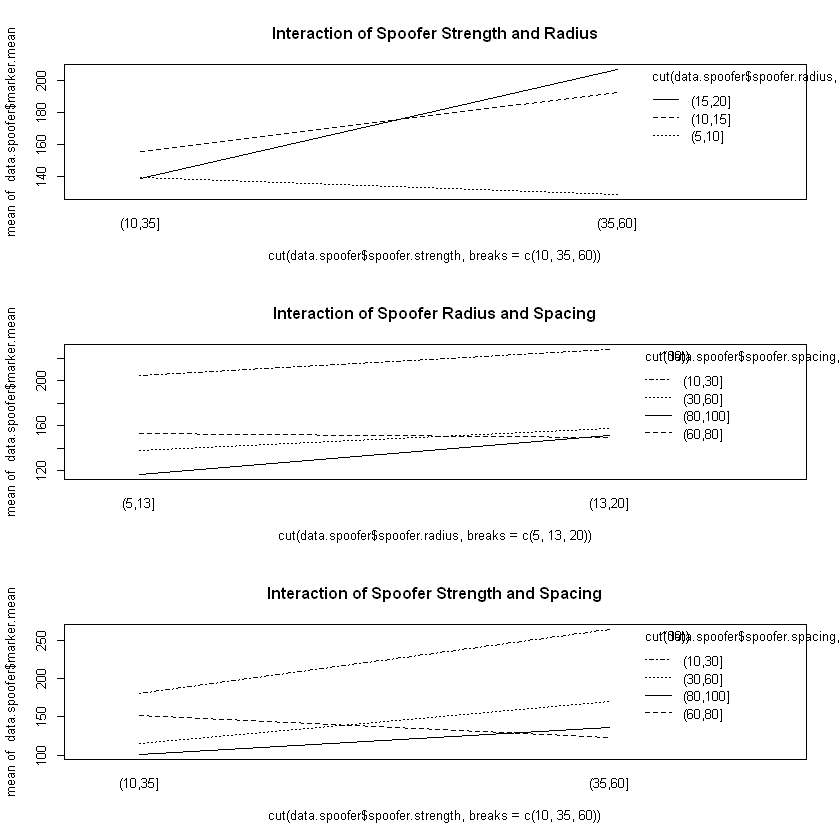

In [23]:
layout(matrix(c(1,2,3),3,1))
interaction.plot(cut(data.spoofer$spoofer.strength, breaks=c(10,35,60)),cut(data.spoofer$spoofer.radius, breaks=c(5,10,15,20)), data.spoofer$marker.mean, main='Interaction of Spoofer Strength and Radius')

interaction.plot(cut(data.spoofer$spoofer.radius, breaks=c(5,13,20)),cut(data.spoofer$spoofer.spacing, breaks=c(10,30,60,80,100)), data.spoofer$marker.mean, main='Interaction of Spoofer Radius and Spacing')

interaction.plot(cut(data.spoofer$spoofer.strength, breaks=c(10,35,60)),cut(data.spoofer$spoofer.spacing, breaks=c(10,30,60,80,100)), data.spoofer$marker.mean, main='Interaction of Spoofer Strength and Spacing')

## Counter UUV System 2 - Bubble Field (Jam Sensors)
The goal of the bubble field system was to reduce the effectiveness of the mine detection sonars to increase the error rate in the minefield survey.

In [24]:
# load baseline datafiles
doe.bubble <- read.csv("./bubble_field_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.bubble.cgrid <- read.csv("./bubble_field/baseline bubble field 5x5-table.csv", skip=6, header=TRUE)
results.bubble.ogrid <- read.csv("./bubble_field/baseline bubble field 5x5 open-table.csv", skip=6, header=TRUE)
results.bubble.horiz <- read.csv("./bubble_field/baseline bubble field 5 horizontal-table.csv", skip=6, header=TRUE)
results.bubble.vert <- read.csv("./bubble_field/baseline bubble field 5 vertical-table.csv", skip=6, header=TRUE)

results.bubble.cgrid$grid = as.factor("closed")
results.bubble.ogrid$grid = as.factor("open")
results.bubble.horiz$grid = as.factor("horizontal")
results.bubble.vert$grid = as.factor("vertical")

results.bubble <- rbind(results.bubble.cgrid, results.bubble.ogrid, results.bubble.horiz, results.bubble.vert)

In [25]:
# format column names
colnames(doe.bubble)[1] <- "experiment.number"

# build the dataset
data.bubble <- merge(doe.bubble, results.bubble, "experiment.number")

# scale to real world size
data.bubble$marker.mean <- data.bubble$marker.mean * 5
data.bubble$marker.std.dev <- data.bubble$marker.std.dev * 5

In [91]:
summary(doe.bubble$field.attenuation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   33.00   55.00   55.01   78.00  100.00 

In [98]:
data.bubble.mine.ecdf <- ecdf(100-data.bubble$count.mine.contacts)
data.bubble.nav.ecdf <- ecdf(data.bubble$max.nav.error)
data.bubble.mean.ecdf <- ecdf(data.bubble$marker.mean[data.bubble$count.mine.contacts>0])
data.bubble.std.ecdf <- ecdf(data.bubble$marker.std.dev[data.bubble$count.mine.contacts>0])

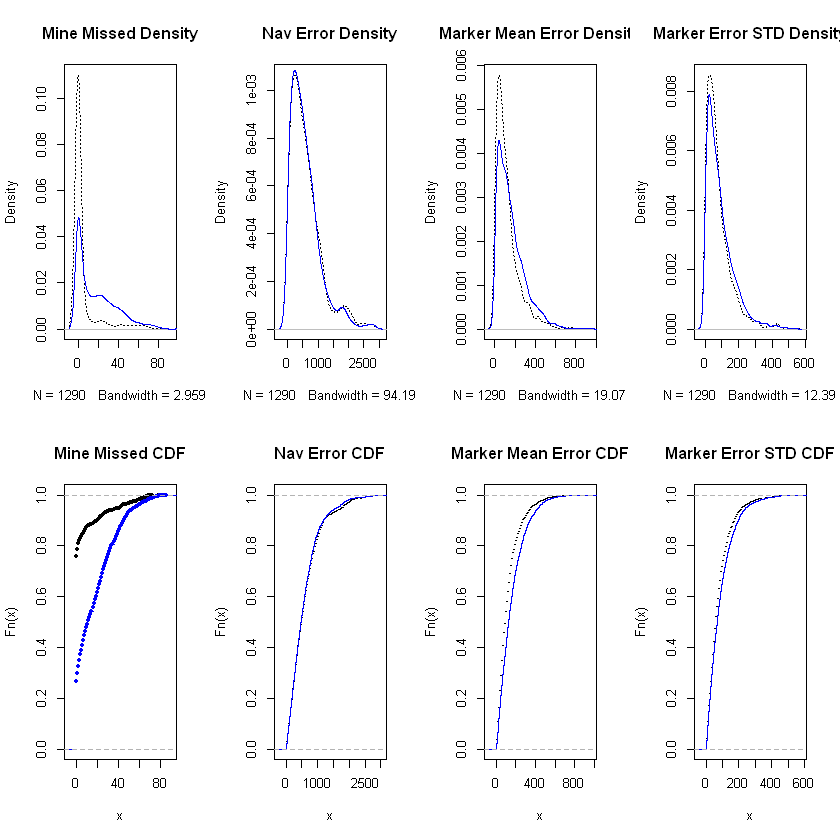

In [99]:
layout(matrix(c(1,2,3,4,5,6,7,8),2,4))
plot(density(100-data.baseline$count.mine.contacts, bw=2.959), main="Mine Missed Density", lty=3)
lines(density(100-data.bubble$count.mine.contacts, bw=2.959), col='blue')
plot(data.baseline.mine.ecdf, main='Mine Missed CDF')
plot(data.bubble.mine.ecdf, add=TRUE, col='blue')
plot(density(data.baseline$max.nav.error, bw=94.19), main='Nav Error Density', lty=3)
lines(density(data.bubble$max.nav.error, bw=94.19), col='blue')
plot(data.baseline.nav.ecdf, main='Nav Error CDF', lty=3)
plot(data.bubble.nav.ecdf, add=TRUE, col='blue')
plot(density(data.baseline$marker.mean, bw=19.07), main='Marker Mean Error Density', lty=3)
lines(density(data.bubble$marker.mean, bw=19.07), col='blue')
plot(data.baseline.mean.ecdf, main='Marker Mean Error CDF', lty=3)
plot(data.bubble.mean.ecdf, add=TRUE, col='blue')
plot(density(data.baseline$marker.std.dev, bw=12.39), main='Marker Error STD Density',lty=3)
lines(density(data.bubble$marker.std.dev, bw=12.39), col='blue')
plot(data.baseline.std.ecdf, main='Marker Error STD CDF', lty=3)
plot(data.bubble.std.ecdf, add=TRUE, col='blue')

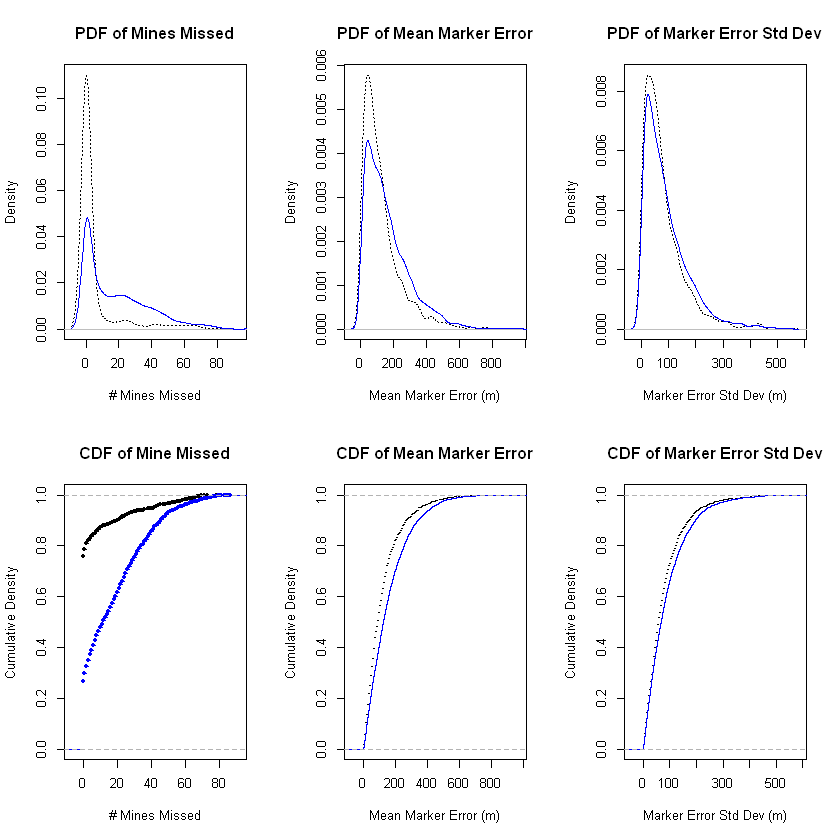

In [100]:
layout(matrix(c(1,2,3,4,5,6),2,3))

# Mines Missed
plot(density(100-data.baseline$count.mine.contacts, bw=2.959), 
     main="PDF of Mines Missed", lty=3,
     xlab='# Mines Missed'
    )
lines(density(100-data.bubble$count.mine.contacts, bw=2.959), col='blue')
plot(data.baseline.mine.ecdf, 
     main='CDF of Mine Missed',
     xlab='# Mines Missed',
     ylab='Cumulative Density'
    )
plot(data.bubble.mine.ecdf, add=TRUE, col='blue')

# Marker Mean
plot(density(data.baseline$marker.mean[data.baseline$count.mine.contacts>0], bw=19.07), 
     main='PDF of Mean Marker Error', lty=3,
     xlab='Mean Marker Error (m)'
    )
lines(density(data.bubble$marker.mean[data.bubble$count.mine.contacts>0], bw=19.07), col='blue')
plot(data.baseline.mean.ecdf, 
     main='CDF of Mean Marker Error', lty=3,
     xlab='Mean Marker Error (m)',
     ylab='Cumulative Density'
    )
plot(data.bubble.mean.ecdf, add=TRUE, col='blue')

# Marker STD
plot(density(data.baseline$marker.std.dev[data.baseline$count.mine.contacts>0], bw=12.39), 
     main='PDF of Marker Error Std Dev',lty=3,
     xlab='Marker Error Std Dev (m)'
    )
lines(density(data.bubble$marker.std.dev[data.bubble$count.mine.contacts>0], bw=12.39), col='blue')
plot(data.baseline.std.ecdf, main='CDF of Marker Error Std Dev', lty=3,
     xlab='Marker Error Std Dev (m)',
     ylab='Cumulative Density'
    )
plot(data.bubble.std.ecdf, add=TRUE, col='blue')

In [136]:
data.baseline.mine.ecdf(20)
data.bubble.mine.ecdf(20)


[1] 0.9

[1] 0.6156977

The plot suggests that the system approach is effective in increasing the number of mines missed.  A one-sided hypothesis test confirms this.

In [28]:
t.test(100-data.bubble$count.mine.contacts, 100-data.baseline$count.mine.contacts, alternative='greater')


	Welch Two Sample t-test

data:  100 - data.bubble$count.mine.contacts and 100 - data.baseline$count.mine.contacts
t = 27.616, df = 2696.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 12.14962      Inf
sample estimates:
mean of x mean of y 
18.044186  5.124806 


In [29]:
eq.mine.bubble <- 100-count.mine.contacts~field.attenuation
model.mine.bubble <- lm(eq.mine.bubble, data=data.bubble)
summary(model.mine.bubble)
anova(model.mine.bubble)
layout(matrix(c(1,2,3,4),2,2))
# plot(model.mine.bubble)


Call:
lm(formula = eq.mine.bubble, data = data.bubble)

Residuals:
   Min     1Q Median     3Q    Max 
-22.66 -15.01  -6.03  11.63  79.44 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       12.27301    0.61751   19.88   <2e-16 ***
field.attenuation  0.10492    0.01014   10.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.06 on 5158 degrees of freedom
Multiple R-squared:  0.02035,	Adjusted R-squared:  0.02016 
F-statistic: 107.1 on 1 and 5158 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
field.attenuation,1,38920.49,38920.4904,107.1275,7.299839e-25
Residuals,5158,1873953.44,363.3101,NA,NA


In [30]:
model.mine.bubble.interact <- lm(100-count.mine.contacts~source.level*field.attenuation, data=data.bubble)
summary(model.mine.bubble.interact)


Call:
lm(formula = 100 - count.mine.contacts ~ source.level * field.attenuation, 
    data = data.bubble)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.490 -11.872  -1.566   9.341  78.904 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    83.4896374  2.6623892  31.359  < 2e-16 ***
source.level                   -0.9485280  0.0347826 -27.270  < 2e-16 ***
field.attenuation              -0.2728148  0.0432800  -6.303 3.15e-10 ***
source.level:field.attenuation  0.0050205  0.0005655   8.878  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.24 on 5156 degrees of freedom
Multiple R-squared:  0.2892,	Adjusted R-squared:  0.2888 
F-statistic: 699.2 on 3 and 5156 DF,  p-value: < 2.2e-16


The field attenuation does not provide a good estimate of the mine misses, as evidenced by an adjusted R-squared of only 0.02.  Since the effect is dependent on geometry, we can look at the effect of bubble field layout on the results

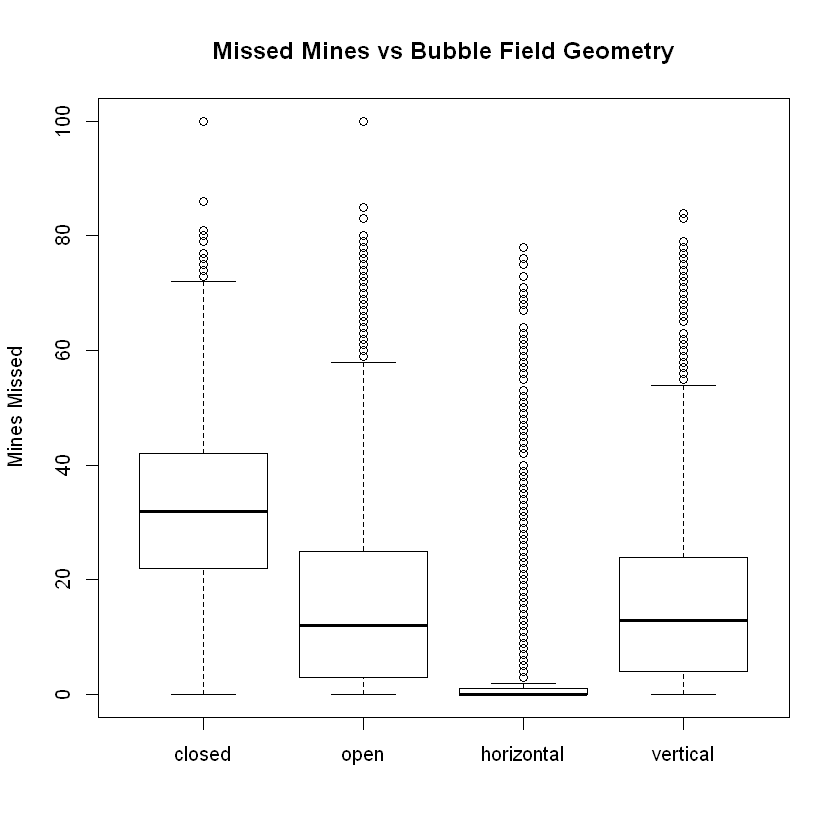

In [31]:
boxplot(100-count.mine.contacts~grid, data=data.bubble, ylab='Mines Missed', main="Missed Mines vs Bubble Field Geometry")

The boxplot shows that geometry has a significant impact on the number of mines detected.  We investigate the impact with a hypothesis test.

In [32]:
t.test(100-data.bubble[data.bubble$grid=='closed',]$count.mine.contacts,100-data.baseline$count.mine.contacts, alternative='greater')
t.test(100-data.bubble[data.bubble$grid=='open',]$count.mine.contacts,100-data.baseline$count.mine.contacts, alternative='greater')
t.test(100-data.bubble[data.bubble$grid=='horizontal',]$count.mine.contacts,100-data.baseline$count.mine.contacts, alternative='greater')
t.test(100-data.bubble[data.bubble$grid=='vertical',]$count.mine.contacts,100-data.baseline$count.mine.contacts, alternative='greater')


	Welch Two Sample t-test

data:  100 - data.bubble[data.bubble$grid == "closed", ]$count.mine.contacts and 100 - data.baseline$count.mine.contacts
t = 43.111, df = 2439.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 25.76217      Inf
sample estimates:
mean of x mean of y 
31.909302  5.124806 



	Welch Two Sample t-test

data:  100 - data.bubble[data.bubble$grid == "open", ]$count.mine.contacts and 100 - data.baseline$count.mine.contacts
t = 19.34, df = 2407.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 11.2003     Inf
sample estimates:
mean of x mean of y 
17.366667  5.124806 



	Welch Two Sample t-test

data:  100 - data.bubble[data.bubble$grid == "horizontal", ]$count.mine.contacts and 100 - data.baseline$count.mine.contacts
t = 0.83537, df = 2576.3, p-value = 0.2018
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.4450165        Inf
sample estimates:
mean of x mean of y 
 5.583721  5.124806 



	Welch Two Sample t-test

data:  100 - data.bubble[data.bubble$grid == "vertical", ]$count.mine.contacts and 100 - data.baseline$count.mine.contacts
t = 19.79, df = 2453.3, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 11.1785     Inf
sample estimates:
mean of x mean of y 
17.317054  5.124806 


The horizontal geometry does not have a statistically significant effect on the number of mines detected.  The vertical and open geomoetries have similar magnitudes of effect, and the closed geometry has the greatest effect.  We can look again at the impact of the field attenuation with the geometry taken into account.  Another interaction suggested by the linear model analysis is between the attenuation factor and threat UUV sonar source level.  The second plot below shows that high source levels are most affected by the field attenuation value.  Lower source levels have increased misses regardless of field attenuation.

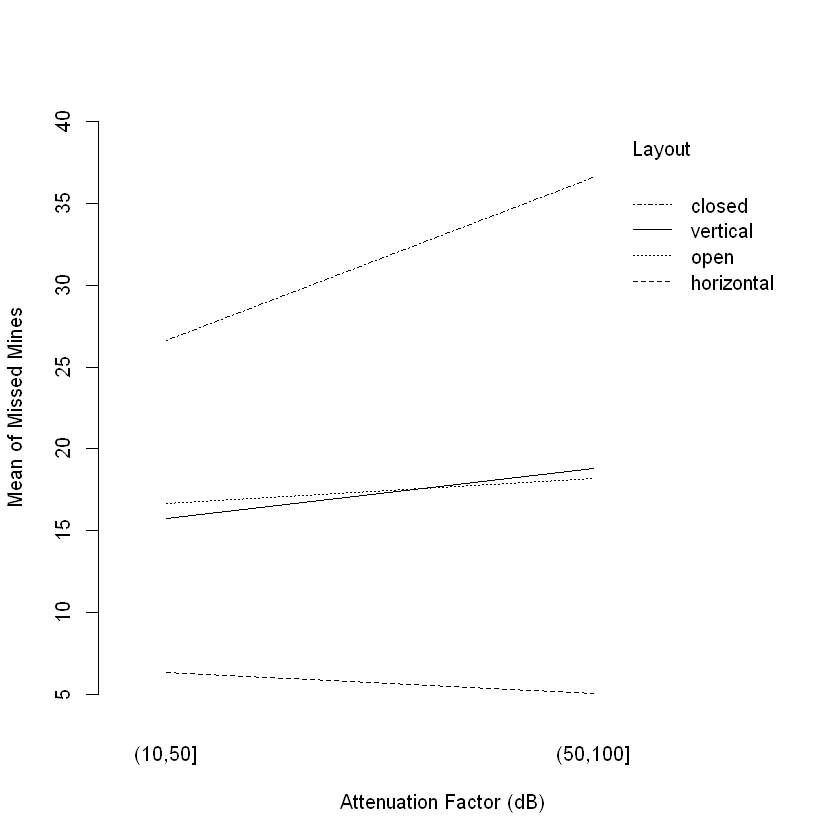

In [82]:
interaction.plot(cut(data.bubble$field.attenuation, breaks=c(10,50,100)), data.bubble$grid, 100 - data.bubble$count.mine.contacts, 
                 #main='Interaction of Geometry and Attenuation Factor',
                trace.label='Layout',
                xlab='Attenuation Factor (dB)',
                 ylab='Mean of Missed Mines',
                 fixed=FALSE,
                 bty='n',
                 ylim=c(5,40)
                )

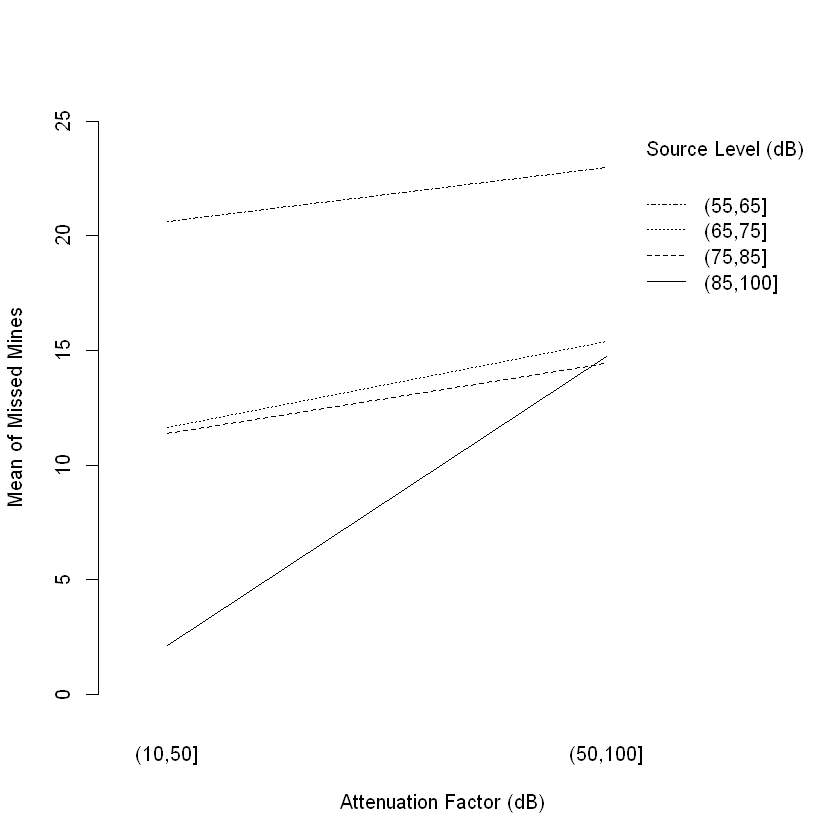

In [76]:
interaction.plot(cut(data.bubble$field.attenuation, breaks=c(10,50,100)), cut(data.bubble$source.level, breaks=c(55,65,75,85,100)), 100-data.bubble$count.mine.contacts, 
                 #main='Interaction of Source Level and Attenuation Factor',
                 trace.label='Source Level (dB)',
                 xlab='Attenuation Factor (dB)',
                 ylab='Mean of Missed Mines',
                 fixed=TRUE,
                 bty='n',
                 ylim=c(0,25)
                )

## Counter UUV System 3 - Weaponized UUV (Hard Kill)
This counter UUV system is designed to intercept and destroy the threat UUV before it is able to complete its mission.

In [35]:
# load uuv killer datafiles
doe.killer <- read.csv("./uuv_killer_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.killer <- read.csv("./killer_uuv/baseline lone killer uuv centered run 4--table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.killer)[1] <- "experiment.number"

# build the dataset
data.killer <- merge(doe.killer, results.killer, "experiment.number")

# scale to real world size
data.killer$marker.mean <- data.killer$marker.mean * 5
data.killer$marker.std.dev <- data.killer$marker.std.dev * 5

# transform kill boolean to factor
data.killer$kill.factor <- as.factor(data.killer$kill.made)

Overall the system concept is effective, resuting in a kill in 83% of the simulation runs.

In [36]:
1 - sum(data.killer$count.uuvs) / count(data.killer)$n

[1] 0.8310078

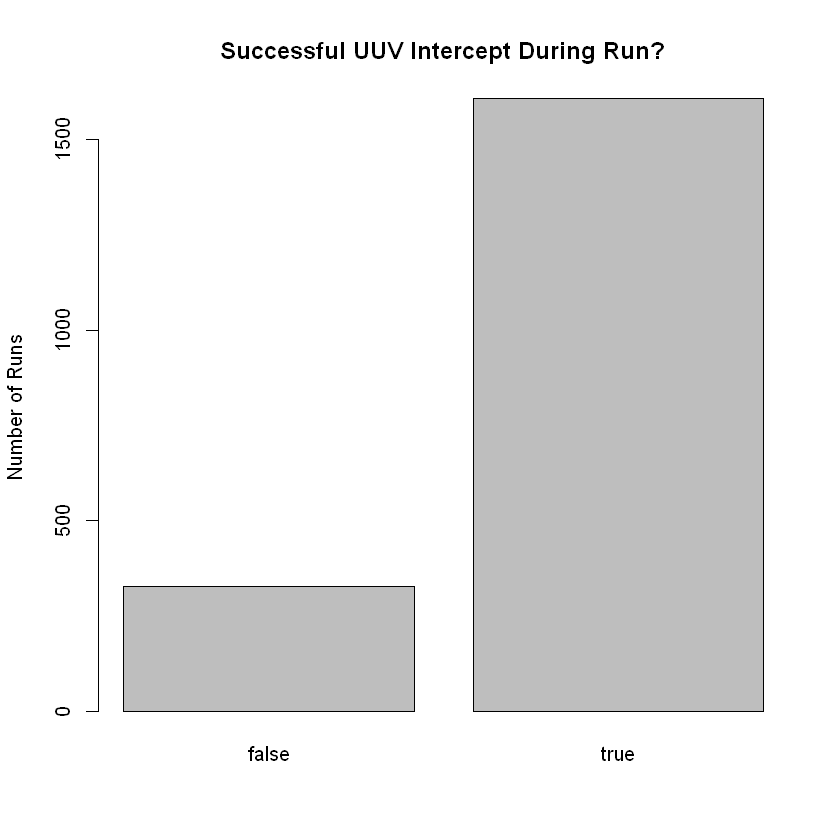

In [37]:
plot(data.killer$kill.factor, main='Successful UUV Intercept During Run?', ylab='Number of Runs')

The next plot shows pairwise plots of the killer system variables against each other, coded by kill success.  A visual analysis shows groupings that should be investigated.  For example, lock timeout has a cluster of misses at low values when plotted with any of the other parameters. There are tighter clusters along both dimensions in the comparinsons of lock timeout and array spacing, and lock timeout and detect radius.  Conversely, the Pk of the weaponized UUV does not seem to have any significant interaction with the other variables, and has misses scattered throughout.

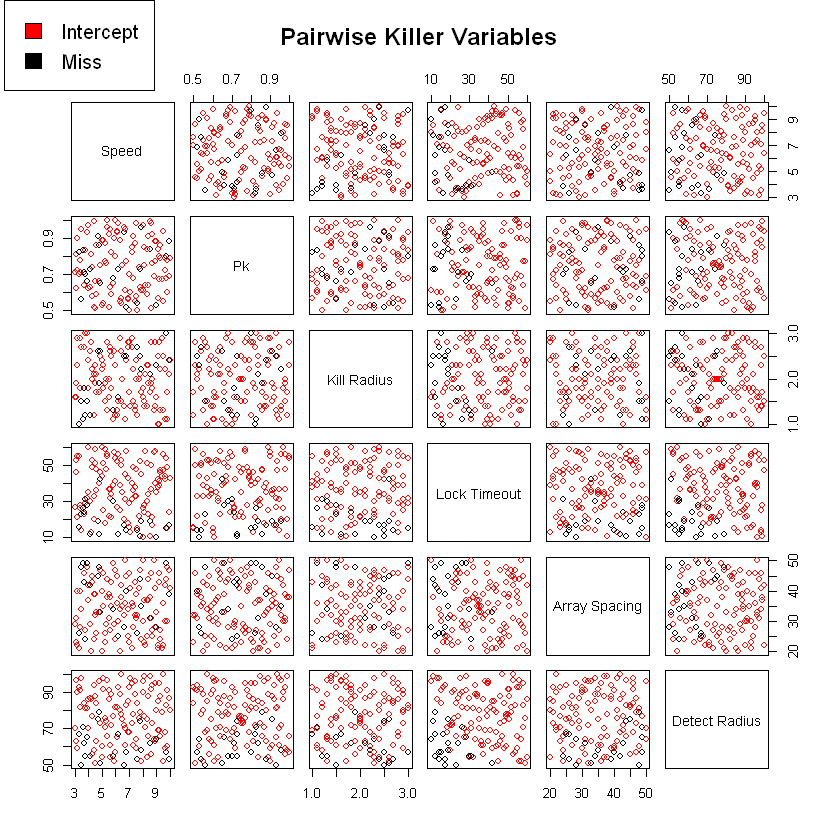

In [38]:
pairs(data.killer[18:23], col=data.killer$kill.factor, main='Pairwise Killer Variables', labels=c('Speed','Pk','Kill Radius','Lock Timeout','Array Spacing','Detect Radius'))
par(xpd=NA)
legend(x=-.07,y=1.08, fill=unique(data.killer$kill.factor), legend=c('Intercept','Miss'))

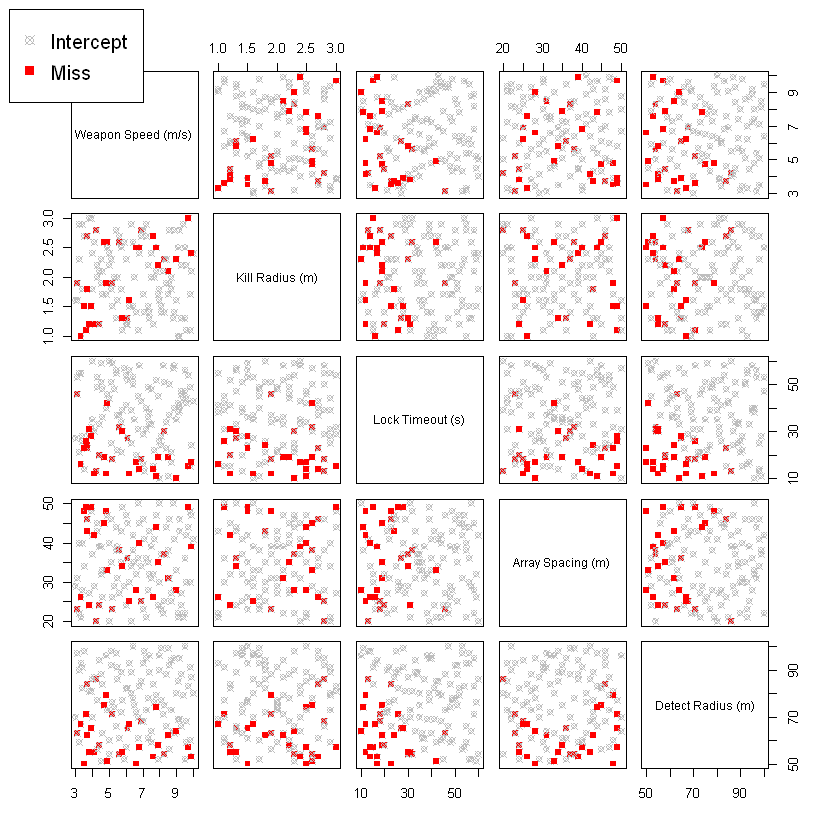

In [39]:
pairs(data.killer[c(18,20:23)], col=c('red','gray')[data.killer$kill.factor], 
      labels=c('Weapon Speed (m/s)','Kill Radius (m)','Lock Timeout (s)','Array Spacing (m)','Detect Radius (m)'),
     pch=c(15,13)[data.killer$kill.factor])
par(xpd=NA)
legend(x=-.05,y=1.05, pch=c(15,13)[unique(data.killer$kill.factor)], col=c('red','gray')[unique(data.killer$kill.factor)], legend=c('Intercept','Miss'))

In [92]:
summary(data.killer[c(18,20:23)])

  killer.speed    killer.kill.rad killer.lock.timeout array.spacing  
 Min.   : 3.000   Min.   :1.000   Min.   :10.00       Min.   :20.00  
 1st Qu.: 4.800   1st Qu.:1.500   1st Qu.:23.00       1st Qu.:28.00  
 Median : 6.500   Median :2.000   Median :35.00       Median :35.00  
 Mean   : 6.501   Mean   :2.002   Mean   :35.01       Mean   :35.01  
 3rd Qu.: 8.300   3rd Qu.:2.500   3rd Qu.:48.00       3rd Qu.:43.00  
 Max.   :10.000   Max.   :3.000   Max.   :60.00       Max.   :50.00  
   det.radius    
 Min.   : 50.00  
 1st Qu.: 63.00  
 Median : 75.00  
 Mean   : 75.01  
 3rd Qu.: 88.00  
 Max.   :100.00  

Probability of kill is a useful measure of performance of the weaponized UUV system.  Each experiment in the NOLH design was run 15 times to obtain a small statistical sample of threat UUV and counter system configurations, from which the Pk was calculated from the number of successful kills obtained in the experiment configuration.

In [41]:
# calculate the probability of kill for each experiment configuration.
data.killer %>% group_by(experiment.number) %>% summarise(agg.pk = 1-mean(count.uuvs)) %>% merge(doe.killer) -> killer.stats

The following interaction plots highlight some system performance characteristics.

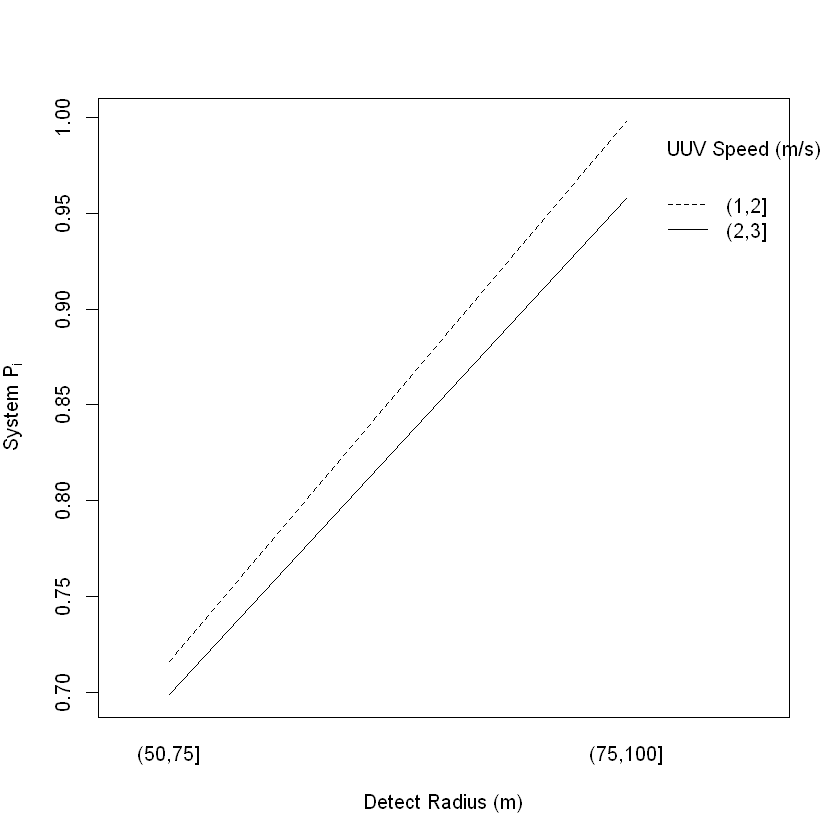

In [42]:
par(xpd=NA)
interaction.plot(cut(killer.stats$det.radius, breaks=c(50,75,100)), cut(killer.stats$uuv.speed, breaks=c(1,2,3)),  killer.stats$agg.pk, trace.label='UUV Speed (m/s)', xlab='Detect Radius (m)', ylab=expression('System P'['i']))

The plot above shows a weaker interaction between the detection radius of the array and the threat UUV Speed.  The probability of kill is much higher for larger detection radius values independent of the UUV speed.

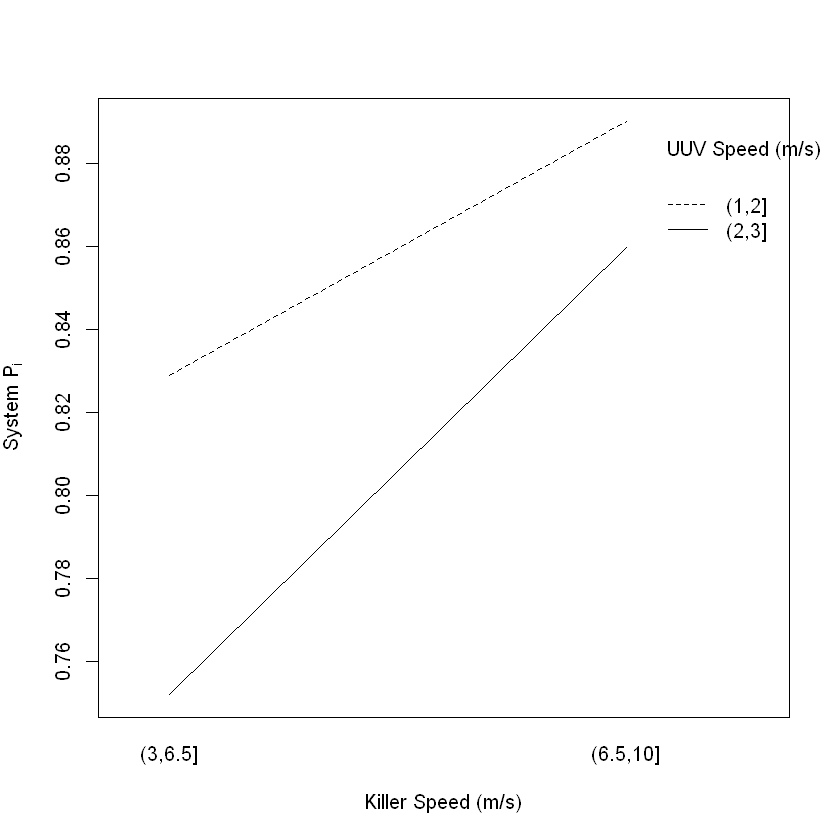

In [43]:
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.speed, breaks=c(3,6.5,10)), cut(killer.stats$uuv.speed, breaks=c(1,2,3)), killer.stats$agg.pk, trace.label='UUV Speed (m/s)', xlab='Killer Speed (m/s)', ylab=expression('System P'['i']))

This plot shows some interaction between the relative speeds of the threat UUV and the weaponized UUV.  The effect is most noticeable when the two vehicles are moving at similar speeds.

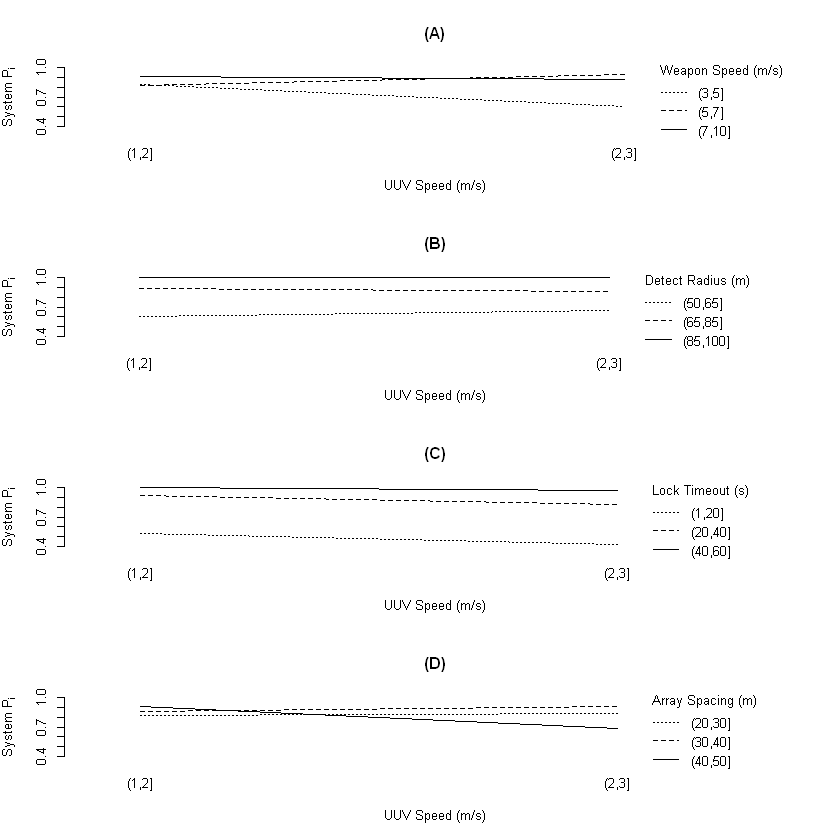

In [84]:
layout(matrix(c(1,2,3,4),4,1))
par(xpd=NA)
interaction.plot( cut(killer.stats$uuv.speed, breaks=c(1,2,3)), cut(killer.stats$killer.speed, breaks=c(3,5,7,10)), killer.stats$agg.pk, trace.label='Weapon Speed (m/s)', xlab='UUV Speed (m/s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n', main='(A)', ylim=c(.4,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$uuv.speed, breaks=c(1,2,3)), cut(killer.stats$det.radius, breaks=c(50,65,85,100)),  killer.stats$agg.pk, trace.label='Detect Radius (m)', xlab='UUV Speed (m/s)', ylab=expression('System P'['i']), bty='n', fixed=TRUE, main='(B)', ylim=c(.4,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$uuv.speed, breaks=c(1,2,3)), cut(killer.stats$killer.lock.timeout, breaks=c(1,20,40,60)),  killer.stats$agg.pk, trace.label='Lock Timeout (s)', xlab='UUV Speed (m/s)', ylab=expression('System P'['i']), bty='n', fixed=TRUE, main='(C)', ylim=c(.4,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$uuv.speed, breaks=c(1,2,3)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)),  killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='UUV Speed (m/s)', ylab=expression('System P'['i']), bty='n', fixed=TRUE, main='(D)', ylim=c(.4,1))

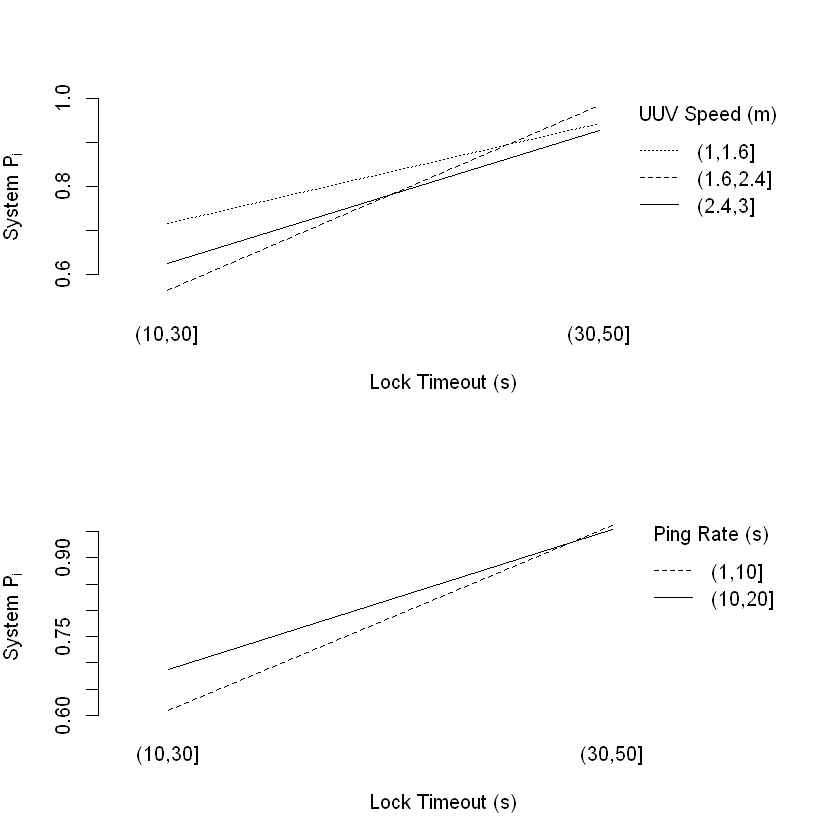

In [45]:
layout(matrix(c(1,2),2,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.lock.timeout, breaks=c(10,30,50)), cut(killer.stats$uuv.speed, breaks=c(1,1.6,2.4,3)), killer.stats$agg.pk, trace.label='UUV Speed (m)', xlab='Lock Timeout (s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.lock.timeout, breaks=c(10,30,50)), cut(killer.stats$sonar_ping_rate, breaks=c(1,10,20)), killer.stats$agg.pk, trace.label='Ping Rate (s)', xlab='Lock Timeout (s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')

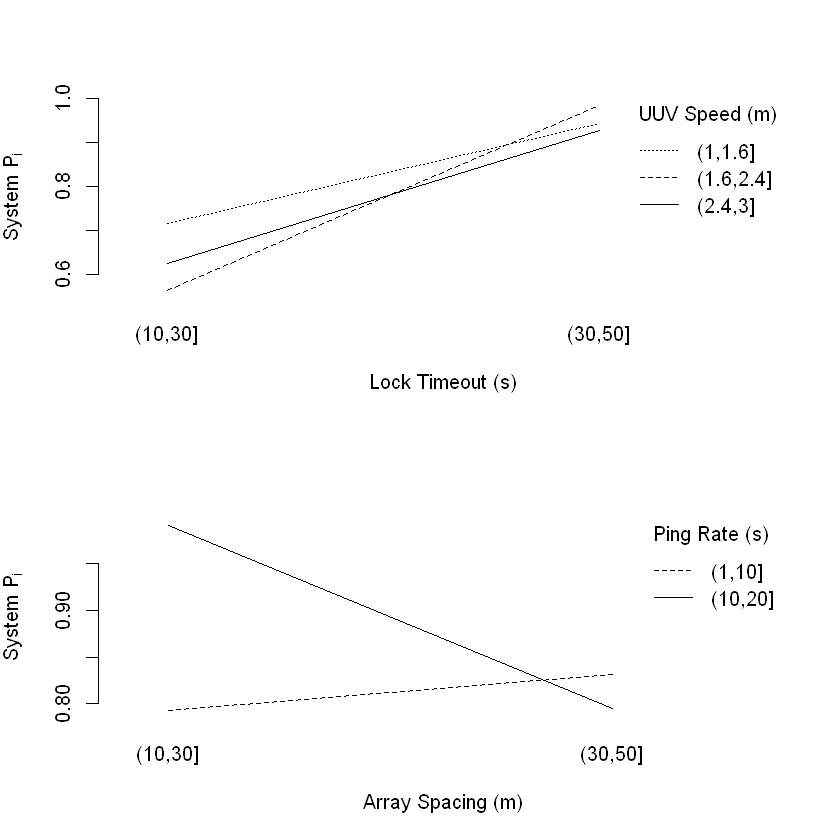

In [89]:
layout(matrix(c(1,2),2,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.lock.timeout, breaks=c(10,30,50)), cut(killer.stats$uuv.speed, breaks=c(1,1.6,2.4,3)), killer.stats$agg.pk, trace.label='UUV Speed (m)', xlab='Lock Timeout (s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')
par(xpd=NA)
interaction.plot(cut(killer.stats$array.spacing, breaks=c(10,30,50)), cut(killer.stats$sonar_ping_rate, breaks=c(1,10,20)), killer.stats$agg.pk, trace.label='Ping Rate (s)', xlab='Array Spacing (m)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')

The plot above illustrates the effect of the lock timeout parameter, i.e. how long the counter system maintains a track before requiring another acquisition.  As expected, a larger detect radius will keep the threat UUV actively locked for longer than a small detect radius.  The data show that a shorter lock timeout has a significant impact for small detect radius values, but approaches similar performance as the larger radius systems when the lock timeout is extended.

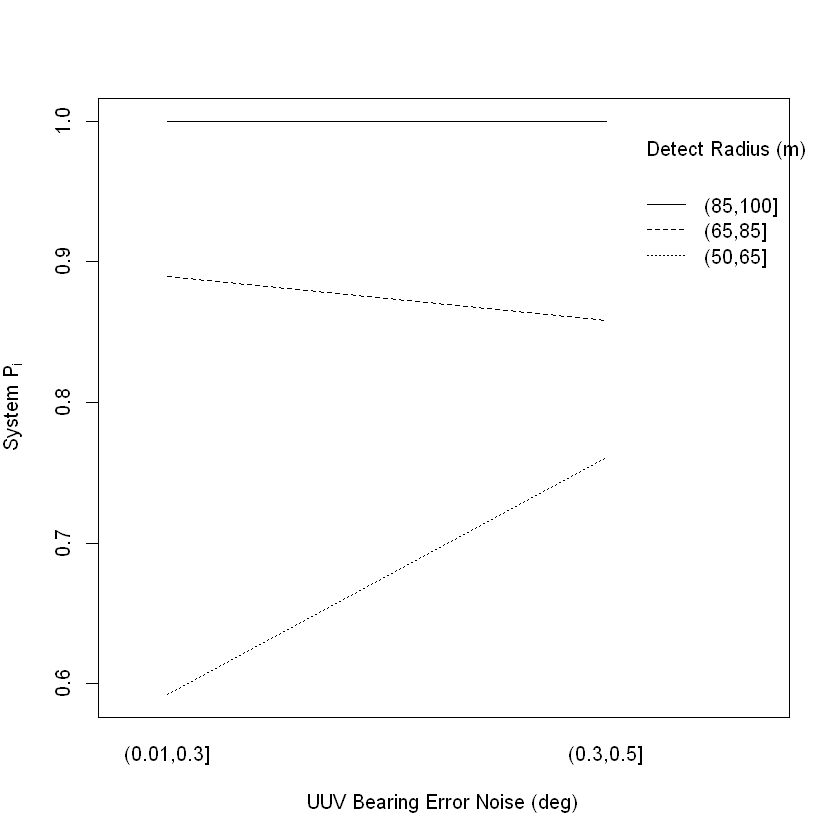

In [47]:
par(xpd=NA)
interaction.plot(cut(killer.stats$nav.bearing.std, breaks=c(0.01,.3, 0.5)),cut(killer.stats$det.radius, breaks=c(50,65,85,100)),killer.stats$agg.pk, trace.label='Detect Radius (m)', xlab='UUV Bearing Error Noise (deg)', ylab=expression('System P'['i']))

Here the threat UUV's navigation performance is compared with the counter system's ability to track it.  A conclusion from this plot is that a well navigated path for the threat UUV could defeat a tracking array with poor detection range, or ability to track since detection radius relates to time to maintain track.

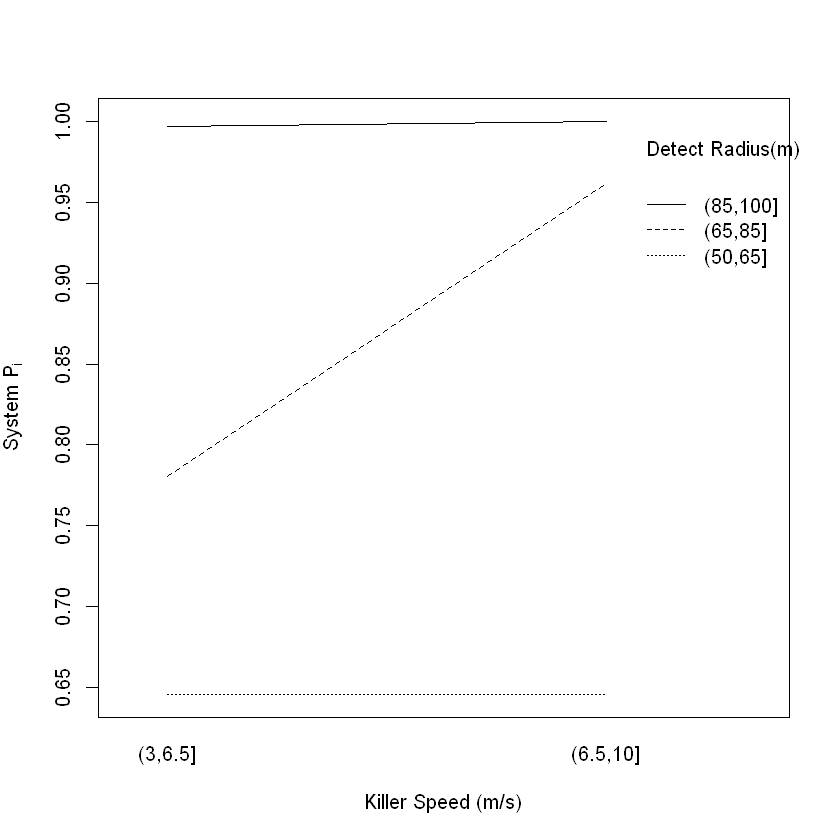

In [48]:
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.speed, breaks=c(3,6.5,10)), cut(killer.stats$det.radius, breaks=c(50,65,85,100)), killer.stats$agg.pk, trace.label='Detect Radius(m)', xlab='Killer Speed (m/s)', ylab=expression('System P'['i']))

The plot above is interesting because it shows again that the detect radius of the array is a dominant parameter.  For both high and low detection radius values, the weaponized UUV speed is irrelevant; it is only when the detection radius is in the middle range that a faster weaponized UUV makes a difference.

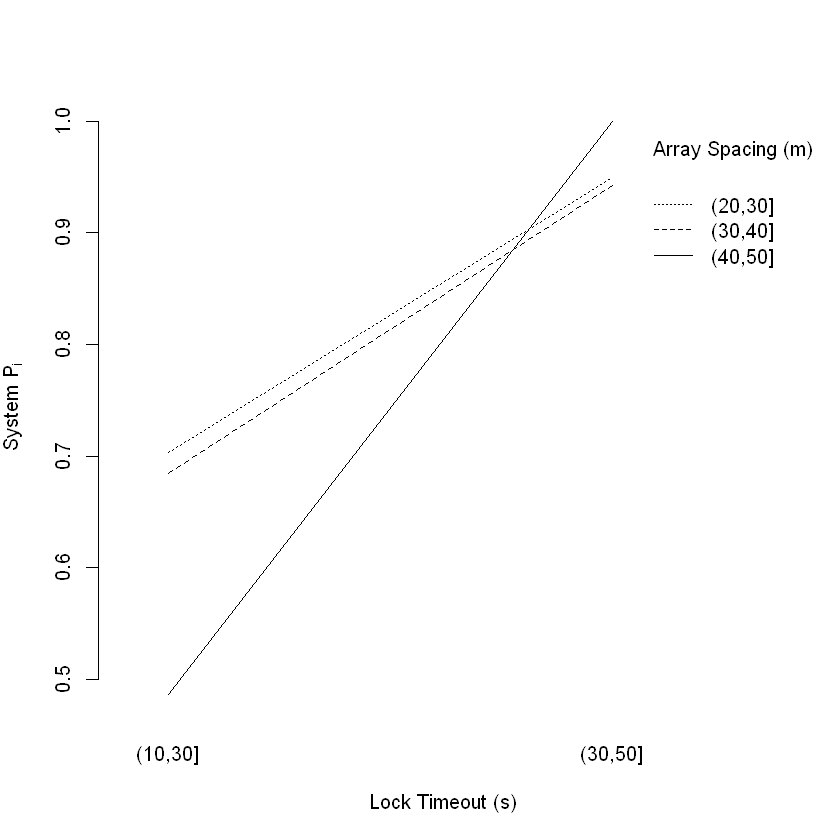

In [49]:
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.lock.timeout, breaks=c(10,30,50)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)), killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='Lock Timeout (s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')

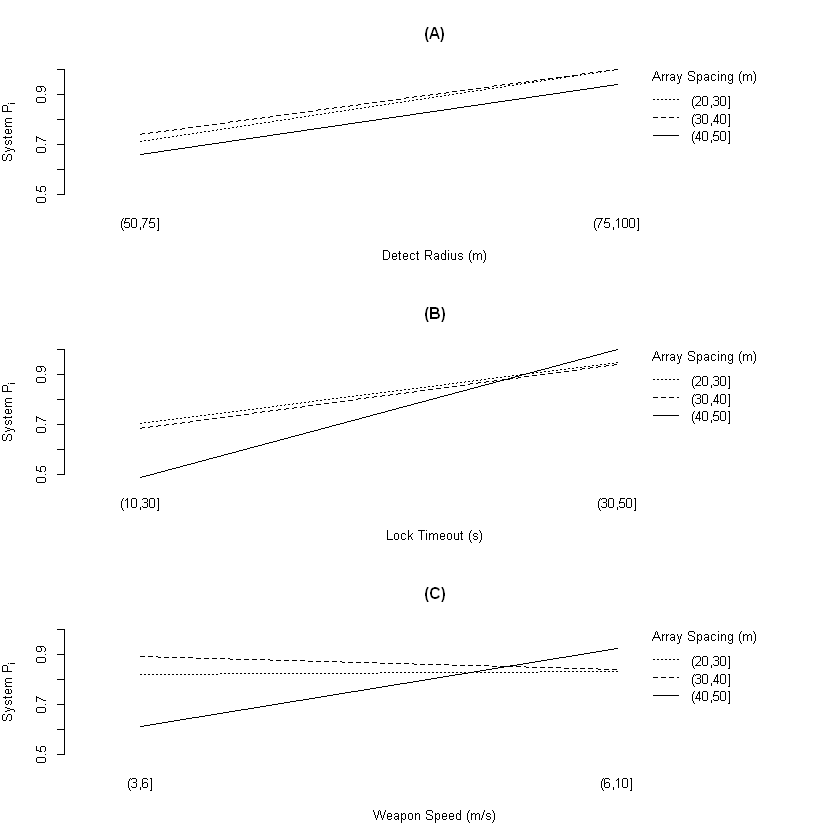

In [86]:
layout(matrix(c(2,1,3),3,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.lock.timeout, breaks=c(10,30,50)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)), killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='Lock Timeout (s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n', main='(B)', ylim=c(.5,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$det.radius, breaks=c(50,75,100)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)), killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='Detect Radius (m)', ylab=expression('System P'['i']), fixed=TRUE, bty='n', main='(A)', ylim=c(.5,1))
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.speed, breaks=c(3,6,10)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)), killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='Weapon Speed (m/s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n', main='(C)', ylim=c(.5,1))

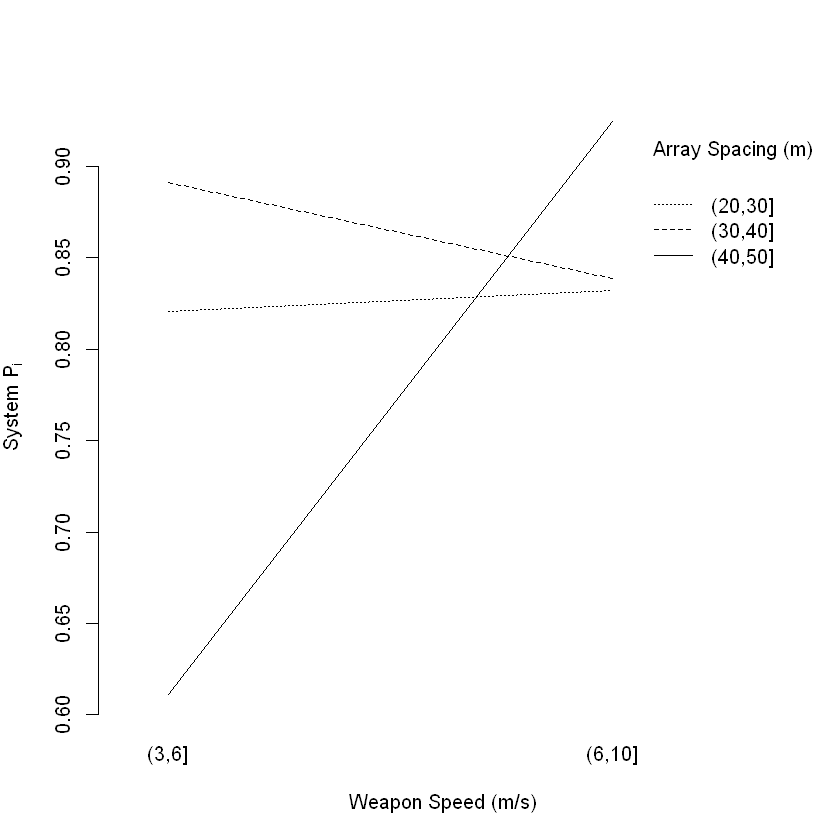

In [51]:
par(xpd=NA)
interaction.plot(cut(killer.stats$killer.speed, breaks=c(3,6,10)), cut(killer.stats$array.spacing, breaks=c(20,30,40,50)), killer.stats$agg.pk, trace.label='Array Spacing (m)', xlab='Weapon Speed (m/s)', ylab=expression('System P'['i']), fixed=TRUE, bty='n')

In this figure, the strong interaction between the lock timeout and the array spacing is shown.  The effect is most pronounced on with the largest array spacings.

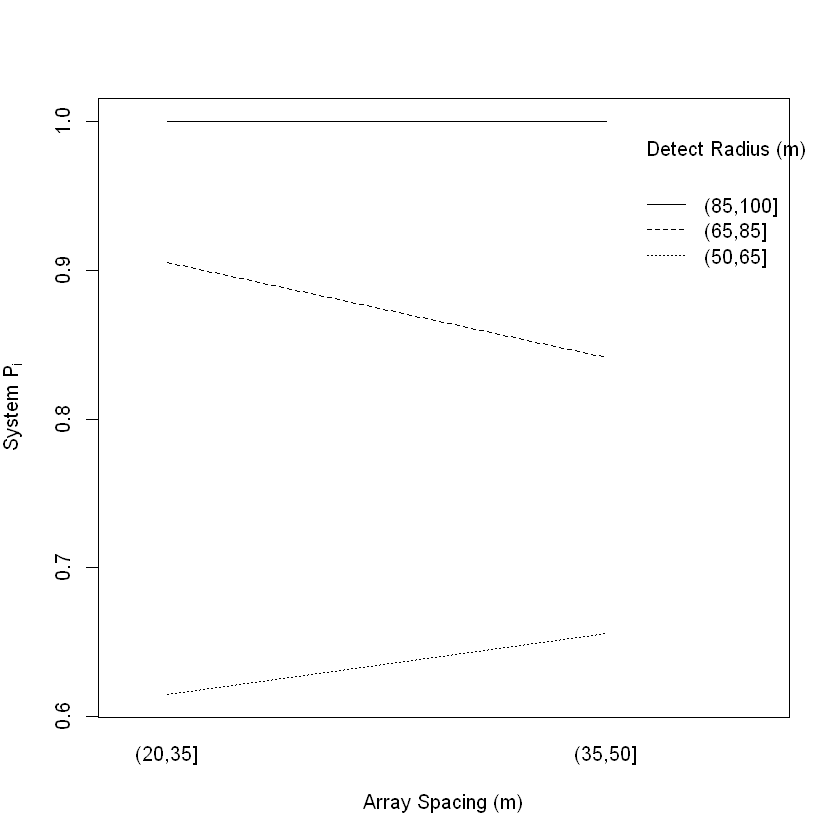

In [52]:
par(xpd=NA)
interaction.plot(cut(killer.stats$array.spacing, breaks=c(20,35,50)), cut(killer.stats$det.radius, breaks=c(50,65,85,100)), killer.stats$agg.pk, trace.label='Detect Radius (m)', xlab='Array Spacing (m)', ylab=expression('System P'['i']))

Here again the dominance of the detection radius parameter can be seen.  For small, mid, and large values of the detection radius parameter, the array spacing does not have a significant impact.

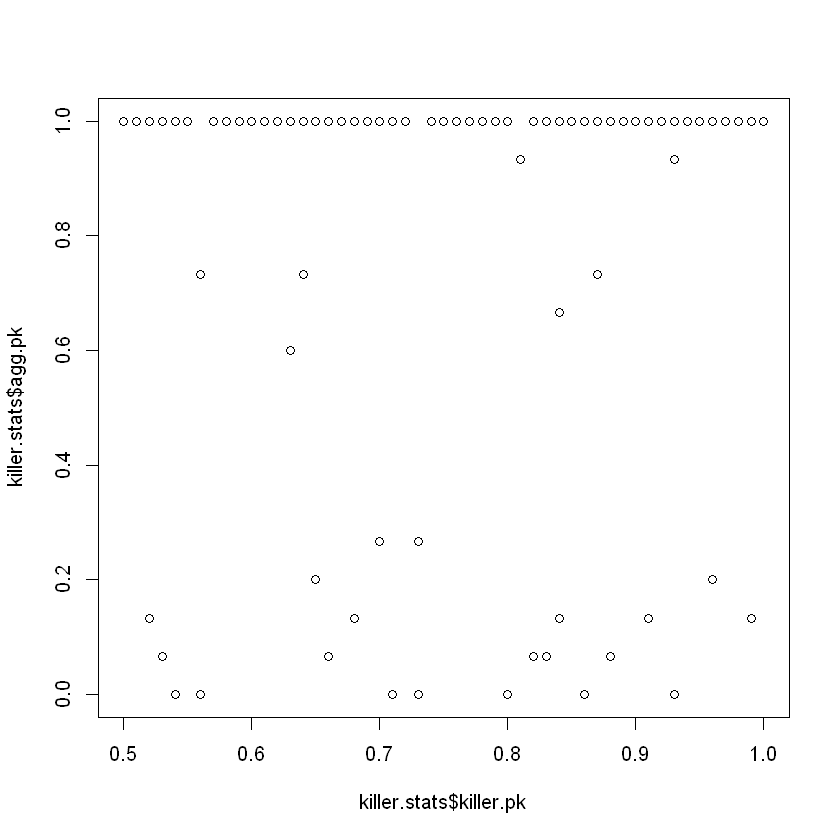

In [53]:
plot(killer.stats$agg.pk~killer.stats$killer.pk)